In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_precision_recall_curve
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download('punkt')
nltk.download('stopwords')
import numpy as np
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kl1356\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kl1356\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
feature_texts = [
       'CHASIMA SHICHRUR OVED CHASIMA_SHICHRUR_LEOVED CHASIMA CHASIMA CHASIMA CHASIMA_SHICHRUR_LEOVED TNUOT_TABLES_VW TNUOT_TABLES_VW OHO_CHASIMA_SHICHRUR_LEOVED OHO_CHASIMA_SHICHRUR_LEOVED',
       'finished HasimotLeOved MLM.OHO.ServiceLayer.Core.Controllers.HasimotLeOvedController.GetMatsavChasimaOved   started SearchOved MLM.OHO.ServiceLayer.Core.Controllers.SearchOvedController.SearchOvedOneToOne   started OvedHearaLeRechiv MLM.OHO.ServiceLayer.Core.Controllers.OvedHearaLeRechivController.GetHearotLeshonit   TNUOT_TABLES_VW ',
       'TNUOT_TABLES_VW started    HasimotLeOved MLM.OHO.ServiceLayer.Core.Controllers.HasimotLeOvedController.GetTguvatHasimaLeRechivimLeOved    TNUOT_TABLES_VW',
    ]
df = pd.DataFrame({'features': feature_texts})

In [11]:
def tokenize_sentence(sentense: str, remove_stop_words: bool = True):
    tokens = word_tokenize(sentense, language='english')
    tokens = [i for i in tokens if i not in string.punctuation] # remove punctuation
    if remove_stop_words: # remove stop words
        russian_stop_words = stopwords.words('english')
        tokens = [i for i in tokens if i not in russian_stop_words]
    snowball = SnowballStemmer(language='english')
    tokens = [snowball.stem(i) for i in tokens ] # stemmed
    return tokens

In [12]:
tfidf = TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words = True))
mx_tf = tfidf.fit_transform(feature_texts)

In [13]:
sdf = pd.DataFrame.sparse.from_spmatrix(mx_tf)
sdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.764226,0.382113,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.382113,0.191057,0.000000,0.000000,0.191057,0.000000,0.225682
1,0.000000,0.000000,0.328961,0.250183,0.328961,0.000000,0.328961,0.328961,0.000000,0.000000,0.328961,0.328961,0.000000,0.500367,0.194290
2,0.000000,0.000000,0.000000,0.403525,0.000000,0.530587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.403525,0.626747


In [14]:
num_clusters = 3
from sklearn.cluster import KMeans
km = KMeans(n_clusters=num_clusters)
#km.fit(mx_tf)
idx=km.fit(mx_tf)
label  = km.predict(mx_tf)
print(label)
print(idx)
clusterkm=km.labels_.tolist()
#clusterkm
#frame=pd.DataFrame(texts)

[2 1 0]
KMeans(n_clusters=3)


In [15]:
find_nearest_to = """
"Action started, controller: HasimotLeOved, action: MLM.OHO.ServiceLayer.Core.Controllers.HasimotLeOvedController.GetMatsavChasima (MLM.OHO.ServiceLayer.Core)" 
SELECT .SIDURI_CHASIMA_SHICHRUR AS MEZAHE_CHASIMA, .MISPAR_OVED AS MisparOved, CODE_SIBA AS CODE_SIBAT_CHASIMA, .TAARICH_ME AS TAARICH_CHASIMA, COALESCE(CODE_MACHOZ, 0) AS MACHOZ_CHOSEM, .CODE_MAKOR_MEIDA AS CODE_MAKOR_MEIDA_CHASIMA, HEARA AS HEARA_CHASIMA, SIDURI_CHASIMA_SHICHRUR AS MEZAHE_SHICHRUR, CODE_SIBA AS CODE_SIBAT_SHICHRUR, TAARICH_ME AS TAARICH_SHICHRUR, COALESCE(CODE_MACHOZ, 0) AS MACHOZ_MESHACHRER, "sh".CODE_MAKOR_MEIDA AS CODE_MAKOR_MEIDA_SHICHRUR, COALESCE("sh".HEARA, '') AS HEARA_SHICHRUR, COALESCE("e".CODE_MISHTAMESH_YOTSER, '') AS CODE_MISHTAMESH_YOTSER, "e".TAARICH_YETZIRAT_RESHUMA AS TAARICH_YETSIRAT_RESHUMA, COALESCE("e".CODE_MISHTAMESH_MEADKEN, '') AS CODE_MISHT_MEADKEN_CHASIMA, "e".TAARICH_IDKUN_RESHUMA AS TAARICH_IDKUN_RESHUMA_CHASIMA, COALESCE(CODE_MISHTAMESH_MEADKEN, '') AS CODE_MISHT_MEADKEN_SHICHRUR, TAARICH_IDKUN_RESHUMA AS TAARICH_IDKUN_RESHUMA_SHICHRUR
FROM OHO_OWNER.OHO_CHASIMA_SHICHRUR_LEOVED 
LEFT JOIN OHO_OWNER.OHO_CHASIMA_SHICHRUR_LEOVED  ON .SIDURI_CHASIMA_SHICHRUR = .HATZBAA_LE_RESHUMA
WHERE (.MISPAR_OVED = :p__misparOved_0) AND (.CODE_SUG_PEULA = 1) 
2021-11-10 12:51:11.9435 Low eventId:  message: SQL: Executed DbCommand (1ms) [Parameters=[p__misparOved_0='282279' (Nullable = true)], CommandType='Text', CommandTimeout='0']
"""
new_entry = tfidf.transform([find_nearest_to])
pd.DataFrame.sparse.from_spmatrix(new_entry)
km.predict(new_entry)

array([0])

In [16]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
data = load_digits().data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
#df.shape

In [17]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#print(label)

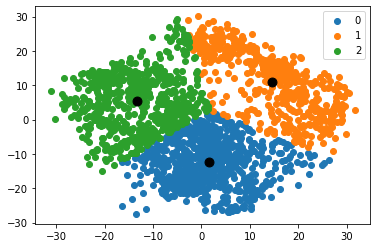

In [18]:
#Getting the Centroids
import matplotlib.pyplot as plt
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results: 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()
